<a href="https://colab.research.google.com/github/Vignesh424/Pima-DecisionTree-RandomForest/blob/main/Pima_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd = pd.read_csv('/content/pima.csv')

In [ ]:
pd.shape

(2071, 9)

In [ ]:
pd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pd.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,3.869145,120.038629,69.366972,20.452438,77.254466,31.963351,0.461766,33.524867,0.332207
std,3.374638,32.035540,19.057795,16.215324,109.335063,7.583244,0.315999,11.992197,0.471118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,22.000000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,126.000000,36.400000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2071 non-null   int64  
 1   Glucose                   2071 non-null   int64  
 2   BloodPressure             2071 non-null   int64  
 3   SkinThickness             2071 non-null   int64  
 4   Insulin                   2071 non-null   int64  
 5   BMI                       2071 non-null   float64
 6   DiabetesPedigreeFunction  2071 non-null   float64
 7   Age                       2071 non-null   int64  
 8   Outcome                   2071 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 145.7 KB


In [ ]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pd[feature_cols] # Features
y = pd.Outcome # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
Y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import *
print('Classification Report:\n',classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       210

   micro avg       1.00      1.00      1.00       622
   macro avg       1.00      1.00      1.00       622
weighted avg       1.00      1.00      1.00       622



In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 1.0


In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

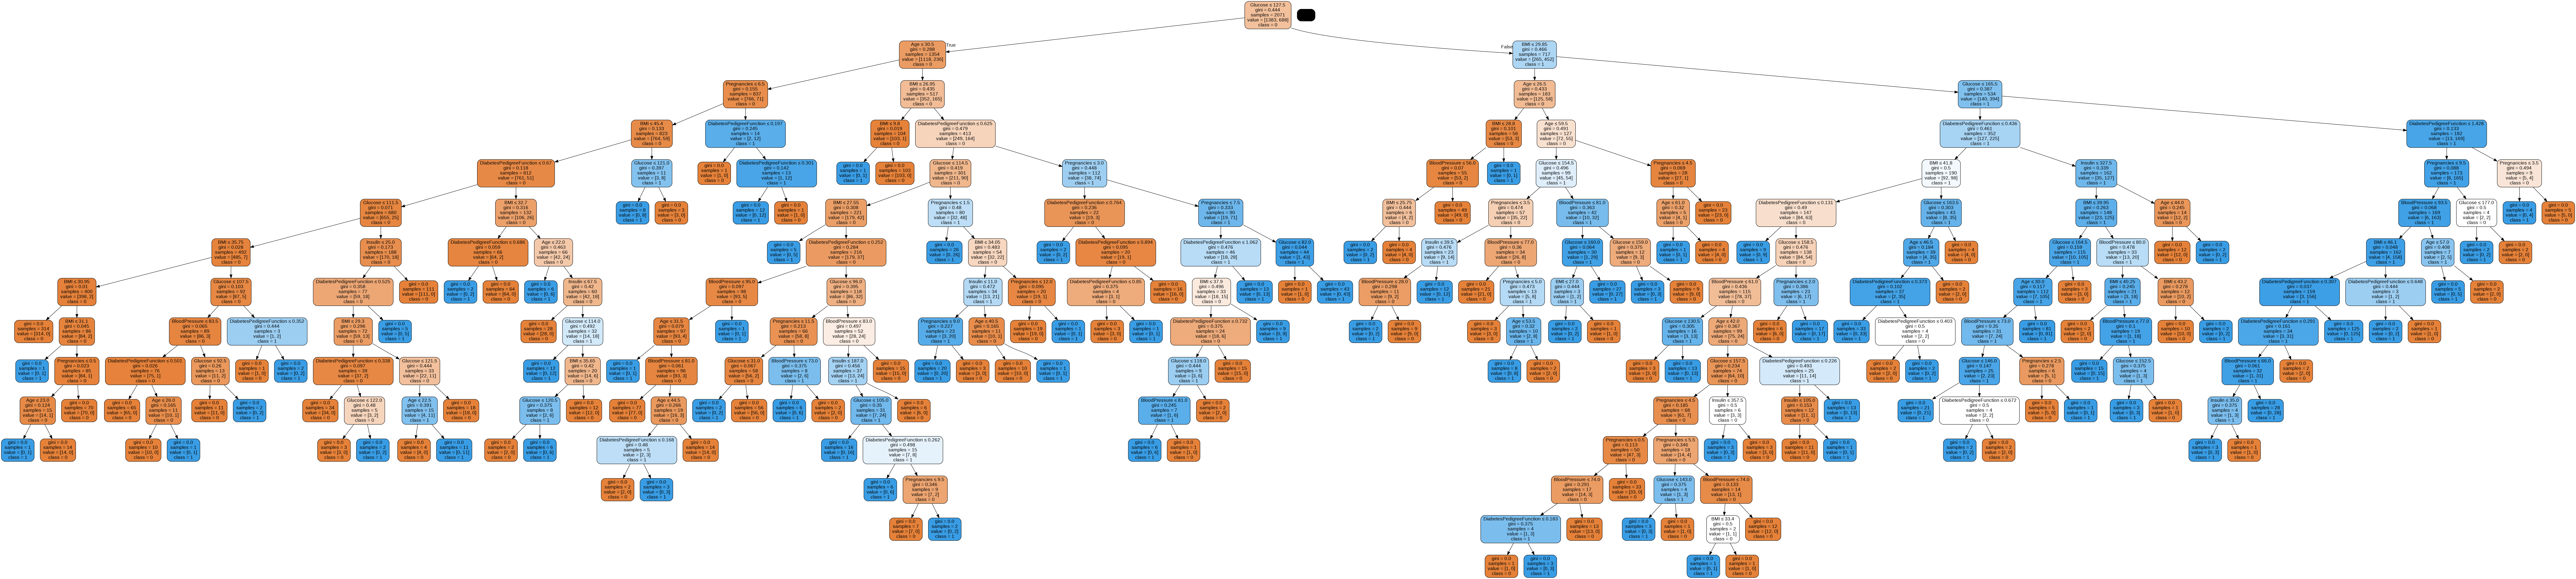

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())   
graph.write('/content/diabetes.png')
Image(graph.create_png())